# Parameter visualization

In this notebook i will develop a way to visualize the data from the parameter extraction and use it to select the images with better quality.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use("seaborn")

In [3]:
TEST_FOLDER = "/home/joaopedro/gdrive/Projects/active/Wild_Duck_Pipeline/wd/test_data/test"
IMAGES = TEST_FOLDER + "/science/reduced/NGC6067"

In [4]:
# Load Parameters DataFrame
# df_address = IMAGES + "/parameters.csv"

df_address = "/home/joaopedro/Desktop/M11_testing/parameters.csv"
df = pd.read_csv(df_address)
means = df.mean()
stds = df.std()

In [5]:
df.columns

Index(['Unnamed: 0', 'file', 'jd', 'airmass', 'min', 'max', 'mean', 'median',
       'std', 'bkg_sky', 'sky_sigma', 'FWHM'],
      dtype='object')

In [6]:
# Visualizing how things are spread over time

#plt.plot(df.jd, df.FWHM)
#for i in [means.FWHM-stds.FWHM, means.FWHM, means.FWHM+stds.FWHM]:
#    plt.axhline(y=i,c="k", ls="--")
#plt.axhline(y=means.FWHM/means.airmass)    
#plt.scatter(df.jd, df.FWHM*df.airmass**-1, c=df.airmass, cmap="viridis_r")
#plt.scatter(df.jd, df.FWHM, c=df.airmass, cmap="plasma_r")
#plt.colorbar()
#plt.title("JD vs FWHM")
#plt.xlabel("Julian Date")
#plt.ylabel("FWHM")
#plt.savefig("/home/joaopedro/Desktop/fwhm.png")

def visualise_image_par(ds, par):
    """
    From the parameters dataset, create visualization for a parameter distribution.
    """
  
    
    std = ds[par].std()
    mean = ds[par].mean()
    
    lines = [mean, mean-std, mean+std]
    
    for line in lines:
        plt.axhline(y = line, ls="--", c="gray", alpha = .5)
        

    plt.scatter(ds.jd, ds[par], c=ds.airmass, cmap="inferno_r", marker="o", ec="k", lw=1)
    plt.plot(ds.jd, ds[par], c="k", ls="-", lw=.5)
    plt.colorbar()
    plt.ylabel(par)
    plt.xlabel("Julian Date")
    plt.title(f"JD vs {par} (Lines: Mean $\pm \sigma$) (Color: Airmass)")
    plt.tight_layout()
        
    plt.show()

In [7]:
# Visualiziing how things change over time

#for i in [means.FWHM-stds.FWHM, means.FWHM, means.FWHM+stds.FWHM]:
#    plt.axhline(y=i,c="k", ls="--")
# plt.axhline(y=df.FWHM.diff()[1:].std())
# plt.plot(df.jd[1:], df.FWHM.diff()[1:])
# plt.plot(df.jd[1:], df.FWHM.diff()[1:], marker="o")
# plt.axhline(y=0, c="k")

def visualise_variability_par(ds, par):
    """
    From the parameters dataset, create visualization for a parameter variability.
    """
  
    std = ds[par].diff().std()
    mean = ds[par].diff().mean()
    deltas = ds.jd.diff()
    mask = deltas < np.median(deltas)
    
    lines = [mean, mean-std, mean+std]
    
    for line in lines:
        plt.axhline(y = line, ls="--", c="gray", alpha = .5)
        

    plt.scatter(ds.jd, ds[par].diff(), c=ds.airmass, cmap="inferno_r", marker="o", ec="k", lw=1)
    plt.plot(ds.jd, ds[par].diff(), c="k", ls="-", lw=.5)
    plt.colorbar()
    plt.ylabel(f"$\Delta$ {par}")
    plt.xlabel("Julian Date")
    plt.title(f"JD vs $\Delta${par} (Lines: Mean $\pm \sigma$) (Color: Airmass)")
    plt.tight_layout()
        
    plt.show()

In [14]:
def inspect_parameter(ds, par, n=5, sigma=1):
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Setup
    std = ds[par].std()
    mean = ds[par].mean()
    lines = [mean, mean-sigma*std, mean+sigma*std]
    
    std2 = ds[par].diff().std()
    mean2 = ds[par].diff().mean()
    lines2 = [mean2, mean2-std2, mean2+std2]
    
    for line in lines:
        ax[0].axhline(y = line, ls="--", c="gray", alpha = .5)
        
    for line in lines2:
        ax[1].axhline(y = line, ls="--", c="gray", alpha = .5)
    # Plot
    
    ax[0].scatter(ds.jd, ds[par].rolling(window=n).mean(), c=ds.airmass, cmap="inferno_r", marker="o", ec="k", lw=1)
    ax[0].plot(ds.jd, ds[par].rolling(window=n).mean(), c="k", ls="-", lw=1)
    ax[0].set_ylabel(par)
    ax[0].set_xlabel("Julian Date")
    ax[0].set_title(f"JD vs {par} (Lines: Mean $\pm \sigma$) (Color: Airmass)")
    
    bar = ax[1].scatter(ds.jd, ds[par].diff(), c=ds.airmass, cmap="inferno_r", marker="o", ec="k", lw=.5)
    ax[1].plot(ds.jd, ds[par].diff().rolling(window=n).mean(), c="k", ls="-", lw=1)
    ax[1].set_ylabel(f"$\Delta$ {par}")
    ax[1].set_xlabel("Julian Date")
    ax[1].set_title(f"JD vs $\Delta${par} (Lines: Mean $\pm \sigma$) (Color: Airmass)")
    
    fig.colorbar(bar)
    fig.tight_layout()
    plt.show()

#for i in range(5, 10, 2):
#    print(i)
#    inspect_parameter(df, "FWHM",n=i) # 5 is cool

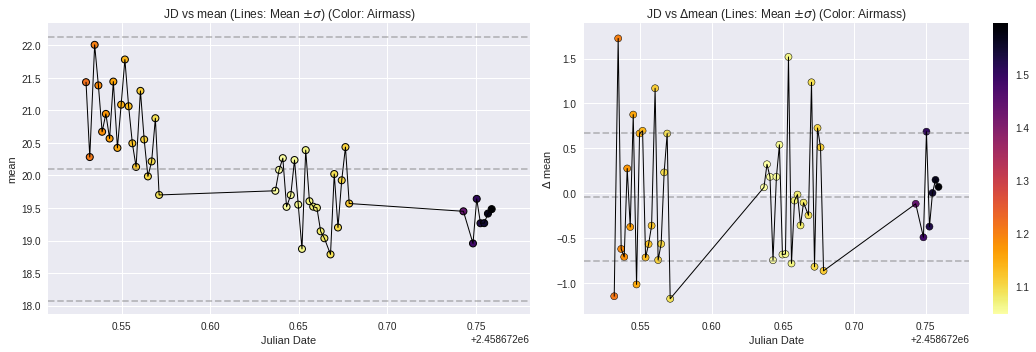

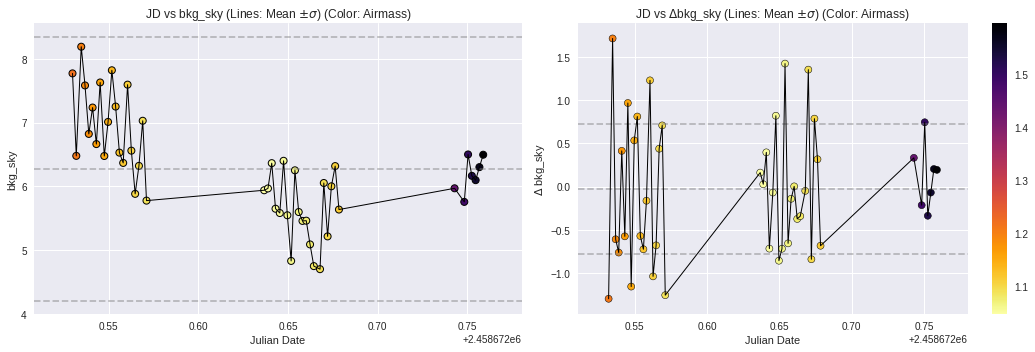

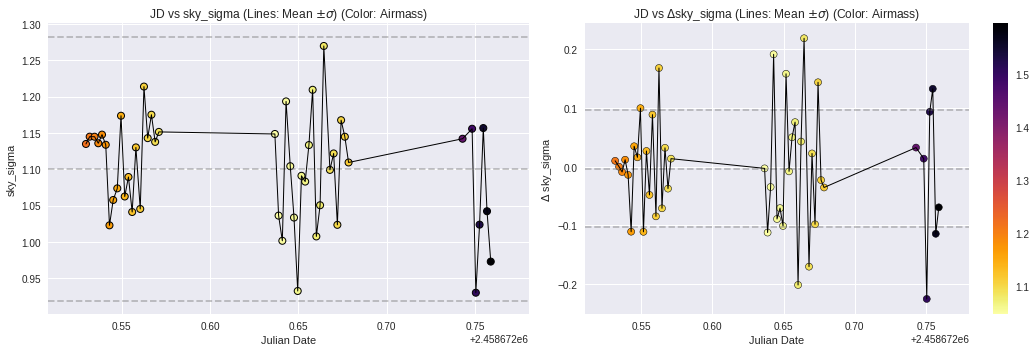

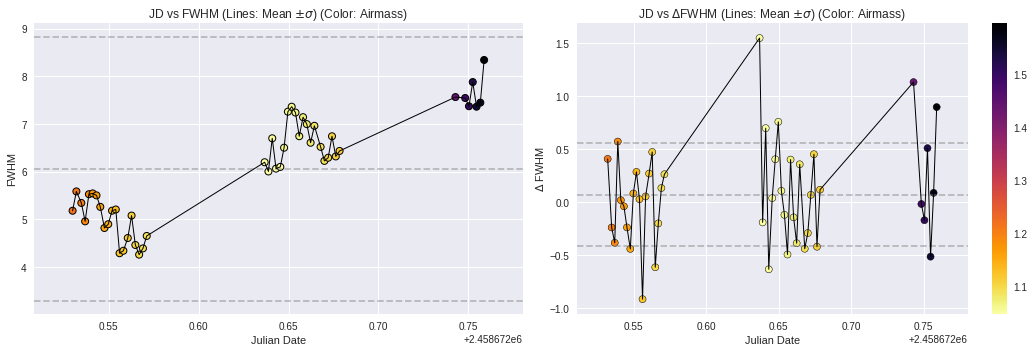

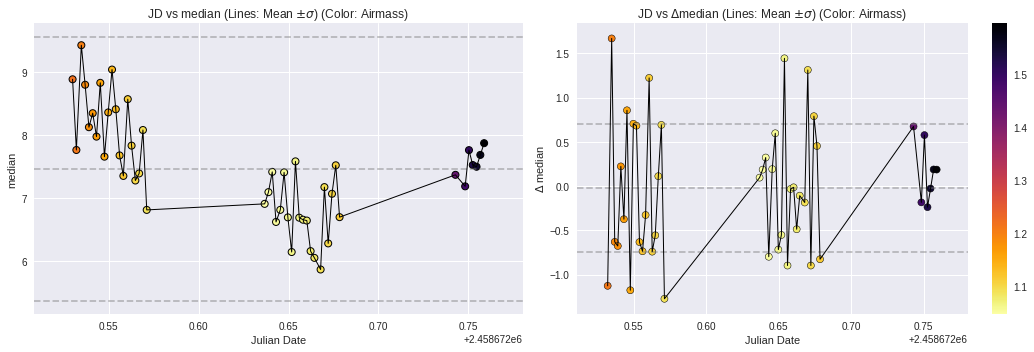

In [36]:
for i in ["mean", "bkg_sky", "sky_sigma", "FWHM", "median"]:
    inspect_parameter(df, i, n=1, sigma=2.5)
    print(5*"\n")

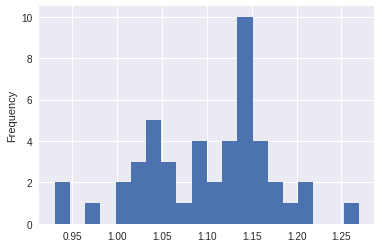

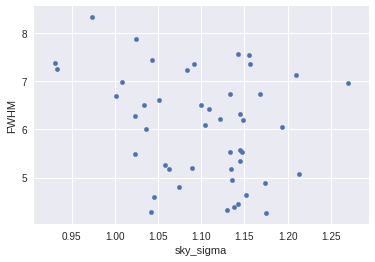

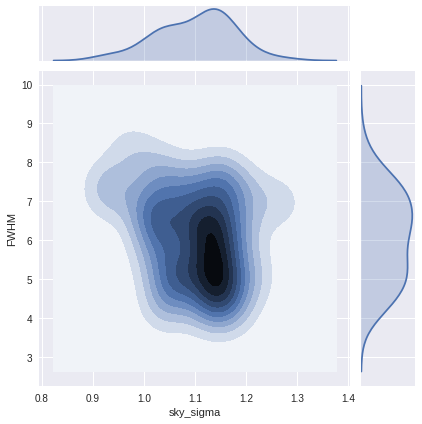

In [86]:
import seaborn as sns

df["sky_sigma"].plot.hist(bins=20)

df.plot("sky_sigma", "FWHM", kind="scatter")

sns.jointplot(x="sky_sigma", y="FWHM", data=df, kind="kde")